**Extract reviews of any product from ecommerce website like amazon & Perform emotion mining**

In [ ]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
} 

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup 

In [ ]:
#look for web-tags in our soup, then append our data to reviewList
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break  

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe.. 
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data 

,Rating,Title,Review,Review_Date
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23 November 2022
1,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26 November 2022
2,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26 November 2022
3,4.0,Good product clear sound,"Good product.Good battery, good sound quality....",26 November 2022
4,4.0,The best one in this price,"Woah!! A really good one in this price, as I h...",17 November 2022
...,...,...,...,...
4995,5.0,Wow,The media could not be loaded.,1 August 2022
4996,3.0,Fragile,Average sound qualitySame as a 100 rupees earp...,28 September 2021
4997,1.0,"Never buy, you will regret.. it stopped workin...",Wastage of money,5 November 2022
4998,3.0,"Speaker OK, Mic POOR","The speakers are fine, music comes clear. But ...",14 July 2021


In [ ]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23 November 2022
1,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26 November 2022
2,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26 November 2022
3,4.0,Good product clear sound,"Good product.Good battery, good sound quality....",26 November 2022
4,4.0,The best one in this price,"Woah!! A really good one in this price, as I h...",17 November 2022


In [ ]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [ ]:
data 

,Rating,Title,Review,Review_Date
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23 November 2022
1,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26 November 2022
2,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26 November 2022
3,4.0,Good product clear sound,"Good product.Good battery, good sound quality....",26 November 2022
4,4.0,The best one in this price,"Woah!! A really good one in this price, as I h...",17 November 2022
...,...,...,...,...
4995,5.0,Wow,The media could not be loaded.,1 August 2022
4996,3.0,Fragile,Average sound qualitySame as a 100 rupees earp...,28 September 2021
4997,1.0,"Never buy, you will regret.. it stopped workin...",Wastage of money,5 November 2022
4998,3.0,"Speaker OK, Mic POOR","The speakers are fine, music comes clear. But ...",14 July 2021


**Data Exploration**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4829 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [ ]:
data.Rating.describe()

count    5000.000000
mean        3.612800
std         1.201151
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
data.Review.isna().sum()

171

In [ ]:
#for those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])


#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

    
data['Review_Date']= review_date[1:] 

**No. of words in each tweet**

In [ ]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,4.0,Got it for 800 and the music quality is more t...,101
1,4.0,Good headphones to buy in this budget. Only th...,37
2,4.0,It has amazing design with stylish look. Sound...,36
3,4.0,"Good product.Good battery, good sound quality....",18
4,4.0,"Woah!! A really good one in this price, as I h...",48


**No. of stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,4.0,Got it for 800 and the music quality is more t...,101,39
1,4.0,Good headphones to buy in this budget. Only th...,37,15
2,4.0,It has amazing design with stylish look. Sound...,36,12
3,4.0,"Good product.Good battery, good sound quality....",18,4
4,4.0,"Woah!! A really good one in this price, as I h...",48,23


**No. of digits**

In [ ]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,4.0,Got it for 800 and the music quality is more t...,101,39,4
1,4.0,Good headphones to buy in this budget. Only th...,37,15,0
2,4.0,It has amazing design with stylish look. Sound...,36,12,0
3,4.0,"Good product.Good battery, good sound quality....",18,4,0
4,4.0,"Woah!! A really good one in this price, as I h...",48,23,0


**No. of URLs**

In [ ]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,4.0,Got it for 800 and the music quality is more t...,101,39,4,0
1,4.0,Good headphones to buy in this budget. Only th...,37,15,0,0
2,4.0,It has amazing design with stylish look. Sound...,36,12,0,0
3,4.0,"Good product.Good battery, good sound quality....",18,4,0,0
4,4.0,"Woah!! A really good one in this price, as I h...",48,23,0,0


In [ ]:
data.web_links.value_counts()
#no weblinks 

0    5000
Name: web_links, dtype: int64

**No. of hashtags**

In [ ]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,4.0,Got it for 800 and the music quality is more t...,101,39,4,0,0
1,4.0,Good headphones to buy in this budget. Only th...,37,15,0,0,0
2,4.0,It has amazing design with stylish look. Sound...,36,12,0,0,0
3,4.0,"Good product.Good battery, good sound quality....",18,4,0,0,0
4,4.0,"Woah!! A really good one in this price, as I h...",48,23,0,0,0


In [ ]:
data.hashtag.value_counts()
# 4 hashtags

0    4997
1       3
Name: hashtag, dtype: int64

**Feature Engineering**

In [ ]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 
data['Month'] = data['Review_Date'].str.split(' ').str[1] 
data['Year'] = data['Review_Date'].str.split(' ').str[2] 
data[['Review_Date', 'date', 'Month', 'Year']] 

,Review_Date,date,Month,Year
0,23 November 2022,23,November,2022
1,26 November 2022,26,November,2022
2,26 November 2022,26,November,2022
3,26 November 2022,26,November,2022
4,17 November 2022,17,November,2022
...,...,...,...,...
4995,1 August 2022,1,August,2022
4996,28 September 2021,28,September,2021
4997,5 November 2022,5,November,2022
4998,14 July 2021,14,July,2021


In [ ]:
data

,Rating,Title,Review,Review_Date,word_count,stopword_count,digits,web_links,hashtag,date,Month,Year
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23 November 2022,101,39,4,0,0,23,November,2022
1,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26 November 2022,37,15,0,0,0,26,November,2022
2,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26 November 2022,36,12,0,0,0,26,November,2022
3,4.0,Good product clear sound,"Good product.Good battery, good sound quality....",26 November 2022,18,4,0,0,0,26,November,2022
4,4.0,The best one in this price,"Woah!! A really good one in this price, as I h...",17 November 2022,48,23,0,0,0,17,November,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5.0,Wow,The media could not be loaded.,1 August 2022,6,2,0,0,0,1,August,2022
4996,3.0,Fragile,Average sound qualitySame as a 100 rupees earp...,28 September 2021,22,8,1,0,0,28,September,2021
4997,1.0,"Never buy, you will regret.. it stopped workin...",Wastage of money,5 November 2022,3,1,0,0,0,5,November,2022
4998,3.0,"Speaker OK, Mic POOR","The speakers are fine, music comes clear. But ...",14 July 2021,41,12,0,0,0,14,July,2021


In [ ]:
#keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1 

,Rating,Title,Review,date,Month,Year
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23,November,2022
1,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26,November,2022
2,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26,November,2022
3,4.0,Good product clear sound,"Good product.Good battery, good sound quality....",26,November,2022
4,4.0,The best one in this price,"Woah!! A really good one in this price, as I h...",17,November,2022
...,...,...,...,...,...,...
4995,5.0,Wow,The media could not be loaded.,1,August,2022
4996,3.0,Fragile,Average sound qualitySame as a 100 rupees earp...,28,September,2021
4997,1.0,"Never buy, you will regret.. it stopped workin...",Wastage of money,5,November,2022
4998,3.0,"Speaker OK, Mic POOR","The speakers are fine, music comes clear. But ...",14,July,2021


**Data Visualisation**


**Reviews by Year**

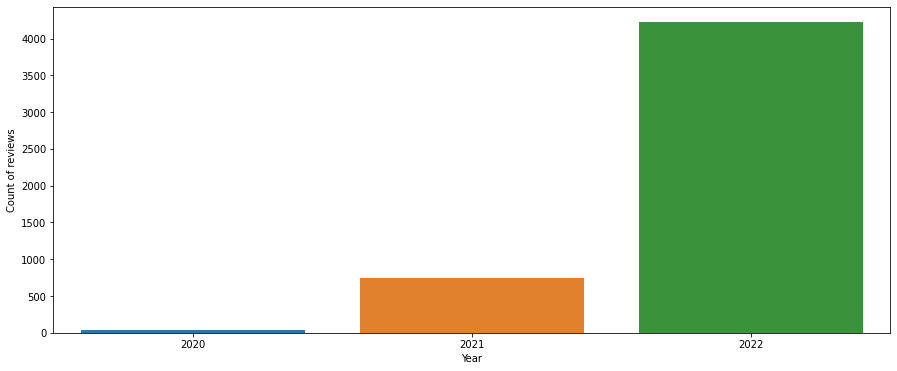

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data1.Year, order=['2020','2021','2022'] ) 
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.show()

**Reviews by Month-Year**

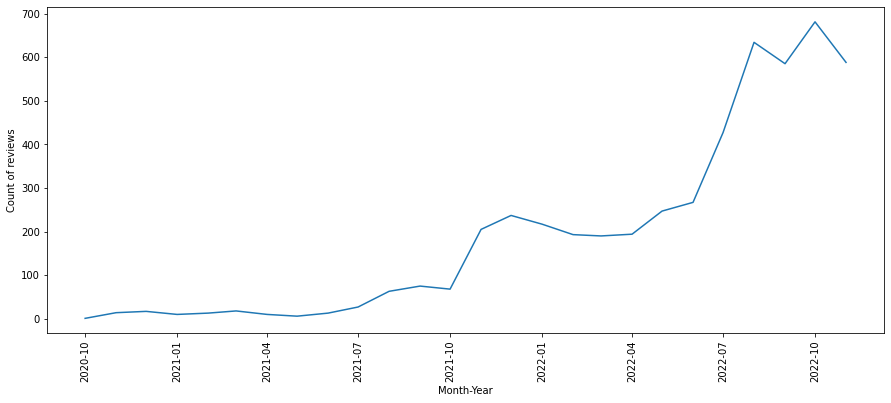

In [ ]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

#sell of BoAt airdopes increased from oct 2021 and peaked during oct 2022-- Graph shows sell drop in nov 2022 because we could capture data till nov 1st wee

**Reviews by Stars**

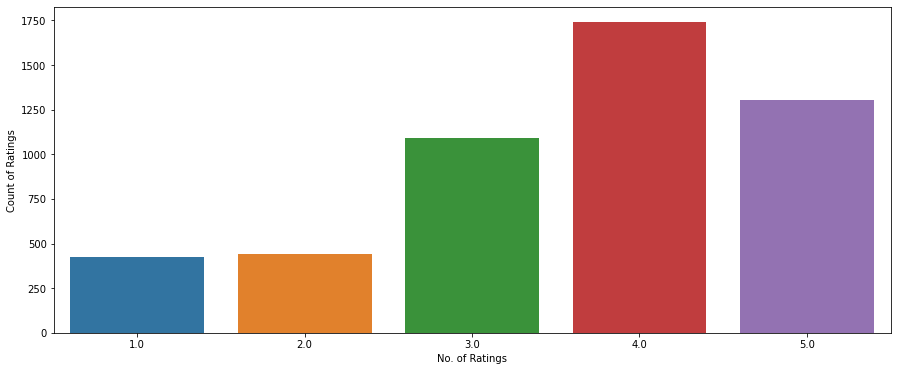

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

**Text Preprocessing**

In [ ]:
#Keeping features which are imp for time being
data2 = data1[['Review']] 
data2 

,Review
0,Got it for 800 and the music quality is more t...
1,Good headphones to buy in this budget. Only th...
2,It has amazing design with stylish look. Sound...
3,"Good product.Good battery, good sound quality...."
4,"Woah!! A really good one in this price, as I h..."
...,...
4995,The media could not be loaded.
4996,Average sound qualitySame as a 100 rupees earp...
4997,Wastage of money
4998,"The speakers are fine, music comes clear. But ..."


**Removing punctuations, digits, emogies and normalising reviews**

In [ ]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [ ]:
corpus

['got it for  and the music quality is more than worth it has been working great for more than  months now surprisingly great battery life buds run upto  hours or more without charge and charge within  minutes the case can completely charge the buds  times the case takes  mins to charge completelymic quality is very poor though might just be a defect on my piece the things we say are feeble to the listener and the background noise is more prominent in the mic than our words yet again might just be my pieces defect',
 'good headphones to buy in this budget only thing that i dont like is the micro usb port to charge the headphones these days type c port are common in every headphones which are convenient to charge',
 'it has amazing design with stylish look sound quality is very good  easy to connect thus easy to handle bass is of high quality we can see battery  alsooverall this product is good ',
 'good productgood battery good sound qualitybut only left side dope allows you to attend 

In [ ]:
data2['clean_reviews'] = corpus 
data2 


,Review,clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...
1,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...
2,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...
3,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...
4,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...
...,...,...
4995,The media could not be loaded.,the media could not be loaded
4996,Average sound qualitySame as a 100 rupees earp...,average sound qualitysame as a rupees earphon...
4997,Wastage of money,wastage of money
4998,"The speakers are fine, music comes clear. But ...",the speakers are fine music comes clear but th...


**Removing stopwords**

In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
1,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
2,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
3,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...,good productgood battery good sound qualitybut...
4,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...,woah really good one price used heaphonesearpo...
5,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,months bought product one best boat earpod
6,"Sounds quality is good, so good for listening ...",sounds quality is good so good for listening m...,sounds quality good good listening music usefu...
7,Noises cancellation and the open and close of ...,noises cancellation and the open and close of ...,noises cancellation open close box loose
8,बात करने में दिक्कत होती है बाकि सब सही है 😄😃,बत करन म दककत हत ह बक सब सह ह,बत करन म दककत हत ह बक सब सह ह
9,Product is fine as expected but sometimes thei...,product is fine as expected but sometimes thei...,product fine expected sometimes connection pro...


In [ ]:
#Tokenisation
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [got, music, quality, worth, working, great, m...
1    [good, headphones, buy, budget, thing, dont, l...
2    [amazing, design, stylish, look, sound, qualit...
3    [good, productgood, battery, good, sound, qual...
4    [woah, really, good, one, price, used, heaphon...
5    [months, bought, product, one, best, boat, ear...
6    [sounds, quality, good, good, listening, music...
7      [noises, cancellation, open, close, box, loose]
8             [बत, करन, म, दककत, हत, ह, बक, सब, सह, ह]
9    [product, fine, expected, sometimes, connectio...
Name: absolute_clean_reviews, dtype: object

In [ ]:
#lemmatisation
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10) 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [got, music, quality, worth, working, great, m...
1    [good, headphone, buy, budget, thing, dont, li...
2    [amazing, design, stylish, look, sound, qualit...
3    [good, productgood, battery, good, sound, qual...
4    [woah, really, good, one, price, used, heaphon...
5    [month, bought, product, one, best, boat, earpod]
6    [sound, quality, good, good, listening, music,...
7       [noise, cancellation, open, close, box, loose]
8             [बत, करन, म, दककत, हत, ह, बक, सब, सह, ह]
9    [product, fine, expected, sometimes, connectio...
Name: absolute_clean_reviews, dtype: object

In [ ]:
#joining tokens into sentence
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great month su...
1,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphone buy budget thing dont like micr...
2,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
3,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...,good productgood battery good sound qualitybut...
4,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...,woah really good one price used heaphonesearpo...
5,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,month bought product one best boat earpod
6,"Sounds quality is good, so good for listening ...",sounds quality is good so good for listening m...,sound quality good good listening music useful...
7,Noises cancellation and the open and close of ...,noises cancellation and the open and close of ...,noise cancellation open close box loose
8,बात करने में दिक्कत होती है बाकि सब सही है 😄😃,बत करन म दककत हत ह बक सब सह ह,बत करन म दककत हत ह बक सब सह ह
9,Product is fine as expected but sometimes thei...,product is fine as expected but sometimes thei...,product fine expected sometimes connection pro...


**Basic Feature Extraction**


**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  
print(vectorizer.vocabulary_)   

{'got': 2146, 'music': 3212, 'quality': 3977, 'worth': 5518, 'working': 5482, 'great': 2154, 'month': 3147, 'surprisingly': 4832, 'battery': 469, 'life': 2805, 'bud': 690, 'run': 4324, 'upto': 5200, 'hour': 2346, 'without': 5461, 'charge': 910, 'within': 5460, 'minute': 3098, 'case': 851, 'completely': 1087, 'time': 5013, 'take': 4861, 'min': 3088, 'completelymic': 1088, 'poor': 3713, 'though': 4992, 'might': 3075, 'defect': 1307, 'piece': 3646, 'thing': 4962, 'say': 4380, 'feeble': 1850, 'listener': 2838, 'background': 392, 'noise': 3297, 'prominent': 3905, 'mic': 3060, 'word': 5477, 'yet': 5563, 'good': 2083, 'headphone': 2256, 'buy': 734, 'budget': 694, 'dont': 1491, 'like': 2821, 'micro': 3064, 'usb': 5210, 'port': 3734, 'day': 1262, 'type': 5144, 'common': 1053, 'every': 1719, 'convenient': 1165, 'amazing': 191, 'design': 1347, 'stylish': 4760, 'look': 2877, 'sound': 4636, 'easy': 1628, 'connect': 1115, 'thus': 5002, 'handle': 2220, 'bass': 448, 'high': 2299, 'see': 4419, 'alsoove

**Removing some more stopwords**

In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya'] 

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
1,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
2,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
3,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...,good productgood battery good sound qualitybut...
4,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...,woah really good one price used heaphonesearpo...
5,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,months bought product one best boat earpod
6,"Sounds quality is good, so good for listening ...",sounds quality is good so good for listening m...,sounds quality good good listening music usefu...
7,Noises cancellation and the open and close of ...,noises cancellation and the open and close of ...,noises cancellation open close box loose
8,बात करने में दिक्कत होती है बाकि सब सही है 😄😃,बत करन म दककत हत ह बक सब सह ह,बत करन म दककत हत ह बक सब सह ह
9,Product is fine as expected but sometimes thei...,product is fine as expected but sometimes thei...,product fine expected sometimes connection pro...


**Let's see how can bigrams and trigrams can be included here**

In [ ]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,able,able connect,able hear,able hear clearly,able hear properly,able hear voice,able listen,absolute,absolutely,absolutely amazing,...,बहत,बहत अचछ,मझ,रह,लए,वल,सउड,सकत,सह,हत
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,able,able charge,able clearly,able clearly hear,able connect,able hear,able hear anything,able hear clearly,able hear properly,able hear voice,...,सफ नह,सफ नह हत,समकष,सह,सह नह,सह नह बहत,हत,हत आज,हत आज सह,हम
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data2 

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
1,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
2,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
3,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...,good productgood battery good sound qualitybut...
4,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...,woah really good one price used heaphonesearpo...
...,...,...,...
4995,The media could not be loaded.,the media could not be loaded,media could loaded
4996,Average sound qualitySame as a 100 rupees earp...,average sound qualitysame as a rupees earphon...,average sound qualitysame rupees earphonevery ...
4997,Wastage of money,wastage of money,wastage money
4998,"The speakers are fine, music comes clear. But ...",the speakers are fine music comes clear but th...,speakers fine music comes clear microphone see...


**Sentiment Analysis**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1') 
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']]  

,absolute_clean_reviews,sentiment_value
0,got music quality worth working great months s...,0
1,good headphones buy budget thing dont like mic...,5
2,amazing design stylish look sound quality good...,12
3,good productgood battery good sound qualitybut...,6
4,woah really good one price used heaphonesearpo...,5
...,...,...
4995,media could loaded,0
4996,average sound qualitysame rupees earphonevery ...,0
4997,wastage money,0
4998,speakers fine music comes clear microphone see...,1


In [ ]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]   

,absolute_clean_reviews,sentiment_value,sentiment
0,got music quality worth working great months s...,0,Neutral
1,good headphones buy budget thing dont like mic...,5,Positive
2,amazing design stylish look sound quality good...,12,Positive
3,good productgood battery good sound qualitybut...,6,Positive
4,woah really good one price used heaphonesearpo...,5,Positive
...,...,...,...
4995,media could loaded,0,Neutral
4996,average sound qualitysame rupees earphonevery ...,0,Neutral
4997,wastage money,0,Neutral
4998,speakers fine music comes clear microphone see...,1,Positive


In [ ]:
data2.sentiment.value_counts()

Positive    3285
Neutral     1062
Negative     653
Name: sentiment, dtype: int64

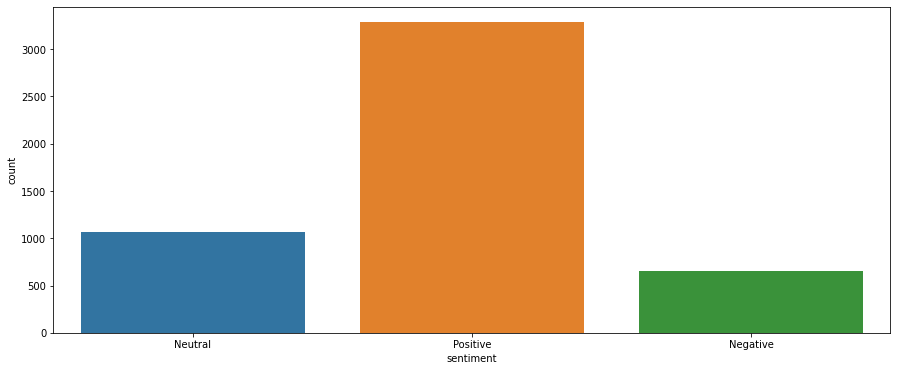

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data2.sentiment) 

**Word cloud for Positive words**

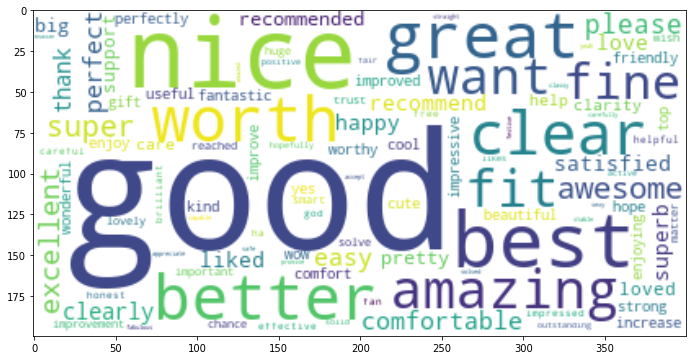

In [ ]:
positive = []
negative = []
neutral = [] 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  
pos =' '.join(positive) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')   

**Word cloud for Negative words**

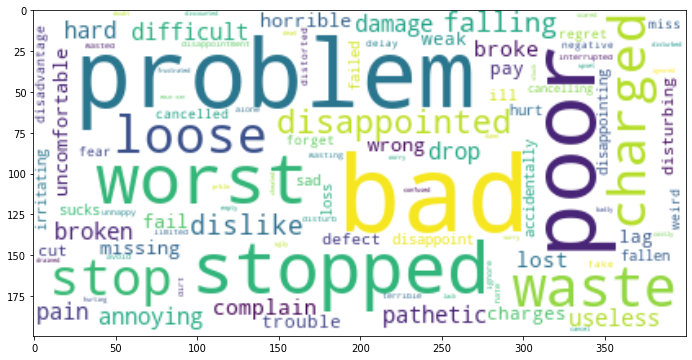

In [ ]:
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')  

**Word cloud for All words**

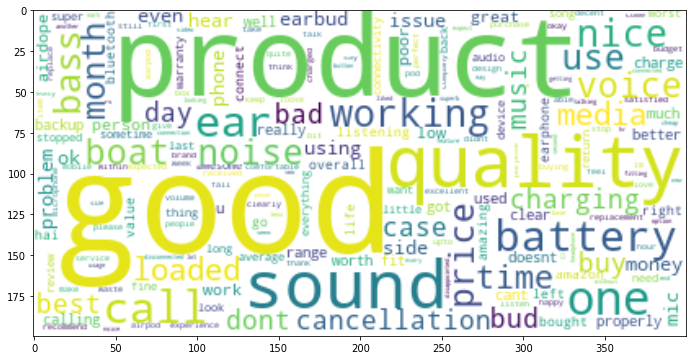

In [ ]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear') 